In [58]:
import pandas as pd
import os
from pathlib import Path 
import math
import pymongo
from pymongo import MongoClient
from datetime import datetime

In [59]:
def unpack(results):
  rs = []
  for r in results:
    r['item']['result'] = r['result']
    rs.append(r['item'])
  return rs

In [67]:
start = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
end = datetime.today().replace(hour=23, minute=59, second=59, microsecond=999999)
client = MongoClient()
db = client['bfg']
trade_results = db.tradeResultEntity
test = pd.DataFrame(unpack(list(trade_results.find({'item.entryTime': {'$gte': start, '$lt': end}}))))
# test = pd.DataFrame(unpack(list(trade_results.find())))

In [68]:
test
# start

,epic,size,wantedEntryLevel,actualEntryLevel,entryTime,exitTime,wantedExitLevel,actualExitLevel,direction,entryType,oneR,barsInTrade,result,mae
0,IX.D.DAX.IFMM.IP,1.0,13091.60,13091.60,2022-06-29 07:01:23.980,2022-06-29 07:03:11.425,13069.858571,13104.6449,BUY,BUY_HIGH,21.741429,1,0.600002,NaN
1,IX.D.FTSE.IFE.IP,1.0,7269.70,7269.70,2022-06-29 07:02:07.085,2022-06-29 07:03:11.627,7278.734418,7278.7344,SELL,SELL_HIGH,9.034418,1,-0.999998,NaN
2,IX.D.DAX.IFMM.IP,1.0,13091.60,13091.60,2022-06-29 07:08:48.186,2022-06-29 07:10:34.194,13063.075366,13108.7148,BUY,BUY_HIGH,28.524634,2,0.600001,NaN
3,IX.D.DAX.IFMM.IP,1.0,13091.60,13091.60,2022-06-29 07:12:12.060,2022-06-29 07:15:03.445,13061.373697,13109.7358,BUY,BUY_HIGH,30.226303,3,0.600001,NaN
4,IX.D.DAX.IFMM.IP,1.0,13091.60,13091.60,2022-06-29 07:22:00.919,2022-06-29 07:28:25.257,13055.551493,13113.2291,BUY,BUY_HIGH,36.048507,6,0.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,IX.D.NASDAQ.IFE.IP,1.0,11651.50,11651.50,2022-06-29 15:33:01.243,2022-06-29 15:35:36.139,11684.886800,11670.8868,SELL,SELL_HIGH,33.386800,2,-0.580673,11669.80
68,IX.D.SPTRD.IFE.IP,5.0,3822.39,3822.39,2022-06-29 15:36:06.738,2022-06-29 15:41:00.413,3830.006456,3823.2400,SELL,SELL_LOW,7.616456,5,-0.111600,3824.79
69,IX.D.NASDAQ.IFE.IP,1.0,11653.50,11653.50,2022-06-29 15:42:33.730,2022-06-29 15:47:00.211,11621.371667,11654.0000,BUY,BUY_HIGH,32.128333,5,0.015563,11638.60
70,IX.D.NASDAQ.IFE.IP,1.0,11651.50,11651.50,2022-06-29 15:51:28.341,2022-06-29 15:56:00.330,11681.246463,11668.2000,SELL,SELL_HIGH,29.746463,5,-0.561411,11672.30


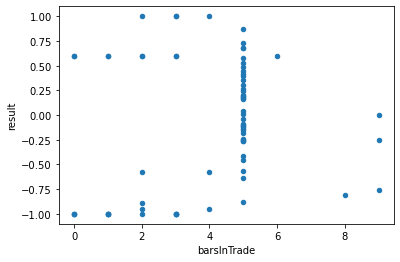

In [69]:
test.plot.scatter('barsInTrade','result');

In [71]:
test['result'].sum()

-5.312645844817073

In [12]:
home = str(Path.home())
filepaths = [f'{home}/bfg/demo/{f}' for f in os.listdir(home + '/bfg/demo') if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))
# Caclulate how many pips +- each trade generated
df['result_pips'] = df.apply(lambda x: x['exit_level'] - x['actual_entry_level'] if 'LONG' in x['reference'] else x['actual_entry_level'] - x['exit_level'], axis=1)
# Caclulate the R multiple for the trade should be between -1 and +2 for my system
df['r_result'] = df['result_pips'] / df['one_r']

Expectency and SQN

<AxesSubplot:ylabel='Frequency'>

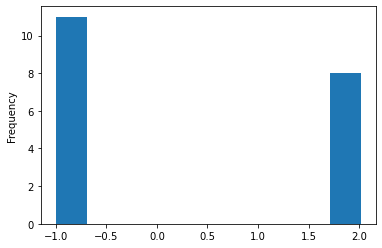

In [13]:
df['r_result'].plot.hist()

In [14]:
expectency = df['r_result'].mean()
print('Expectency: ' + str(expectency)) # How many R i will win or loose per trade
print('Number trades: ' + str(len(df)))

Expectency: 0.2674433062522864
Number trades: 19


In [15]:
std_r = df['r_result'].std()
sqn = (expectency / std_r) * math.sqrt(len(df))
sqn

0.765879333507505